Инициализация проекта

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
data = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = data.data.features 
y = data.data.targets 
  
# metadata 
data.metadata 
  
# variable information 
data.variables

data = pd.concat([X, y], axis=1)

Данные:
Age: Возраст пациента (в годах). Этот признак помогает понять, как возраст влияет на вероятность заболевания сердца.

Sex: Пол пациента (1 = мужской, 0 = женский). Пол может быть важным фактором для определения риска сердечных заболеваний, так как некоторые заболевания могут проявляться по-разному у мужчин и женщин.

Chest pain type (cp): Тип боли в груди (значения: 1 — тип I: угроза, 2 — тип II: боль в груди, 3 — тип III: боль при усиливающемся физическом напряжении, 4 — тип IV: сужение грудной артерии). Этот признак связан с симптомами, которые могут быть индикаторами сердечных заболеваний.

Resting blood pressure (trestbps): Систолическое артериальное давление в покое (в мм рт. ст.). Высокое давление может быть одним из факторов риска заболеваний сердца.

Serum cholesterol (chol): Уровень холестерина в крови (в мг/дл). Высокий уровень холестерина может увеличивать риск сердечно-сосудистых заболеваний.

Fasting blood sugar (fbs): Уровень сахара в крови натощак (1 = больше 120 мг/дл, 0 = меньше 120 мг/дл). Этот признак указывает на риск диабета, который может быть связан с заболеваниями сердца.

Resting electrocardiographic results (restecg): Результаты электрокардиограммы в покое (0 = нормальный, 1 = наличие ST-тенденции, 2 = наличие гипертрофии). Электрокардиограмма может помочь определить нарушения работы сердца.

Maximum heart rate achieved (thalach): Максимально достигнутый пульс (в ударах в минуту). Высокий пульс может быть связан с проблемами в сердечно-сосудистой системе.

Exercise induced angina (exang): Наличие стенокардии, вызванной физической нагрузкой (1 = да, 0 = нет). Стенокардия может быть индикатором заболеваний сердца.

Oldpeak (oldpeak): Снижение сегмента ST (в мм) при физической нагрузке по сравнению с покоем. Это может быть индикатором ишемии миокарда.

Slope of the peak exercise ST segment (slope): Угол наклона сегмента ST при максимальной физической нагрузке (1 = наклон вверх, 2 = горизонтальный, 3 = наклон вниз). Этот показатель помогает в определении состояния сердца при физической нагрузке.

Number of vessels colored by fluoroscopy (ca): Количество сосудов, окрашенных при флуороскопии (0, 1, 2, 3). Этот признак может указать на наличие атеросклероза или других сосудистых заболеваний.

Thalassemia (thal): Талассемия (1 = нормальное состояние, 2 = исправимый дефект, 3 = обратимый дефект, 7 = нормальное). Этот показатель помогает оценить вероятность сердечных заболеваний в контексте генетических факторов.

Heart disease (target): Наличие сердечного заболевания.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [3]:
data.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Обработка пропущенных значений

In [5]:
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

ca          1.320132
thal        0.660066
cp          0.000000
trestbps    0.000000
age         0.000000
sex         0.000000
fbs         0.000000
chol        0.000000
restecg     0.000000
thalach     0.000000
oldpeak     0.000000
exang       0.000000
slope       0.000000
num         0.000000
dtype: float64

Прорпущенные значения в столбцах
- ca
- thal

In [6]:
data['ca'] = data['ca'].fillna(0)

data['thal'] = data['thal'].fillna(3)

In [7]:
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64

Итог заполнения пустых значений
- Столбец ca заполнен 0, т.к. он означает собой количество крупных сосудов, визуализированных при ангиографии, т.е. значение 0 обозначает норму.
- Солбец thal заполнен 3 т.к. он показывает состояние, связанное с аномалией гемоблобина и значение 3 означает отсутсвие аномалий, т.е. норму

Коррекция типов данных

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [9]:
data['ca'] = data['ca'].astype(int)
data['thal'] = data['thal'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  num       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Заключение:
- значения столбцов 'ca' и 'thal' должны иметь тип данных int, а не float, поскольку эти столбцы не нуждаются в десятичном формате.

Обогащение данных

Возрастная группа

In [32]:
def categorize_age(age):
    if age <= 20:
        return 1 #'0-20'
    elif age <= 40:
        return 2 #'21-40'
    elif age <= 60:
        return 3 #'41-60'
    else:
        return 4 #'61+'

data['AgeGroup'] = data['age'].apply(categorize_age)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  num       303 non-null    int64  
 14  AgeGroup  303 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.6 KB


Заключение:
- добавлен столбец возрастной группы

Проверка данных

Дупликаты:

In [11]:
data.duplicated().sum()

np.int64(0)

EDA

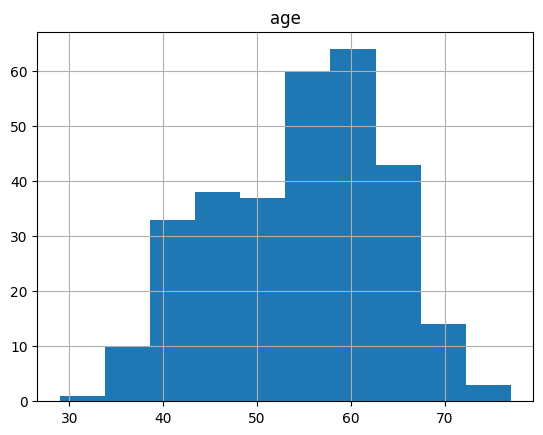

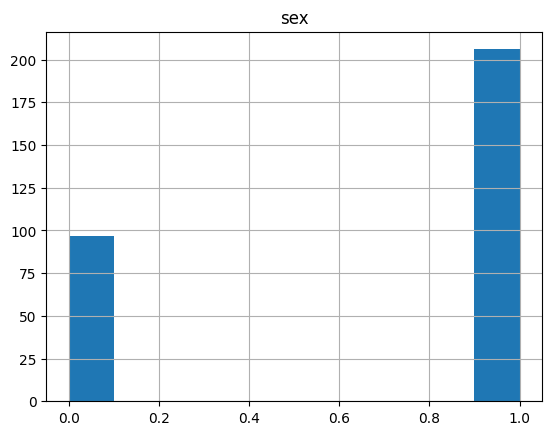

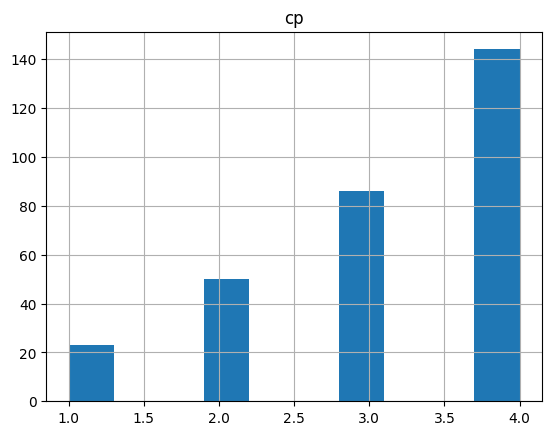

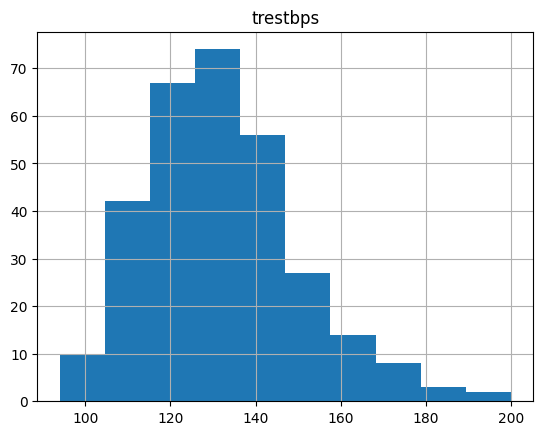

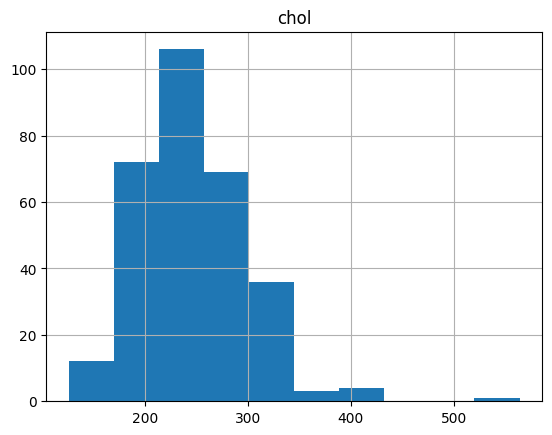

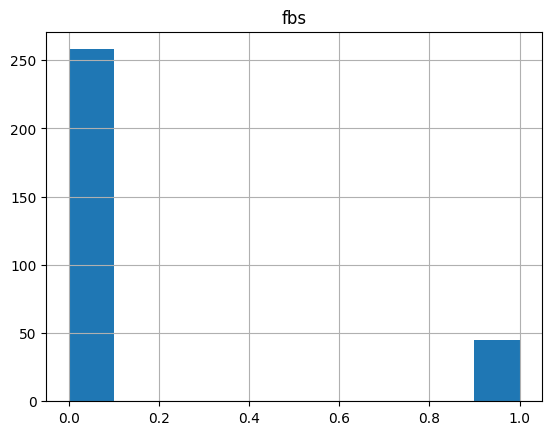

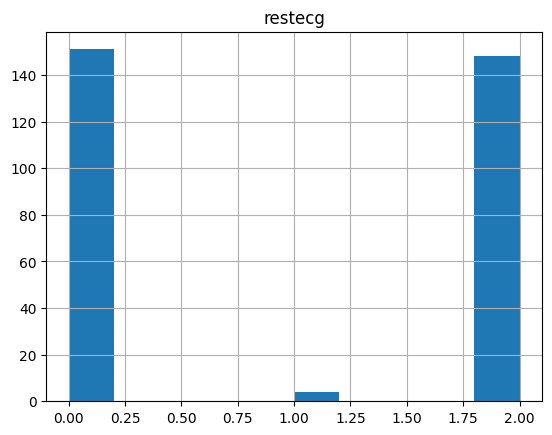

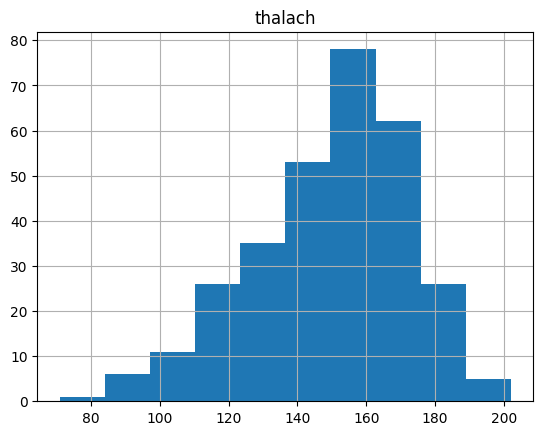

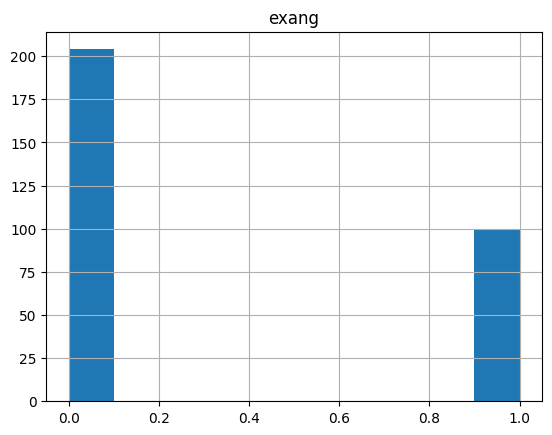

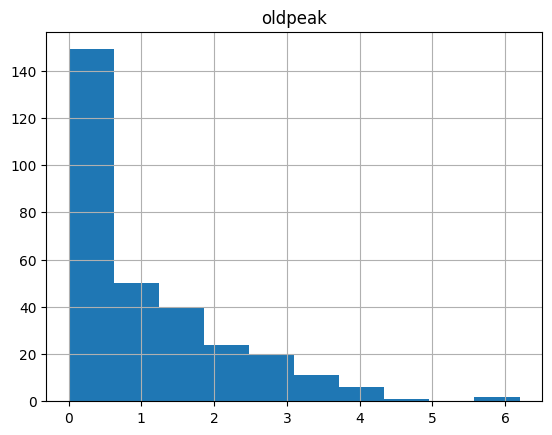

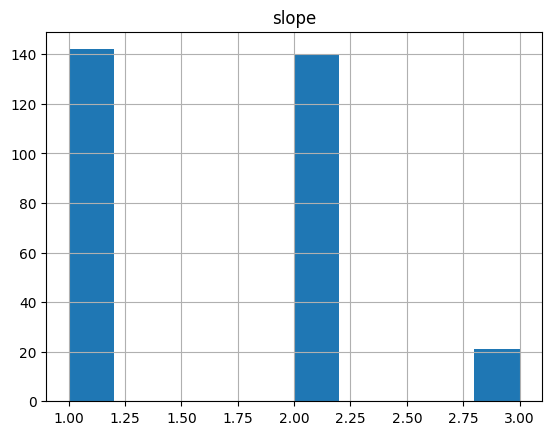

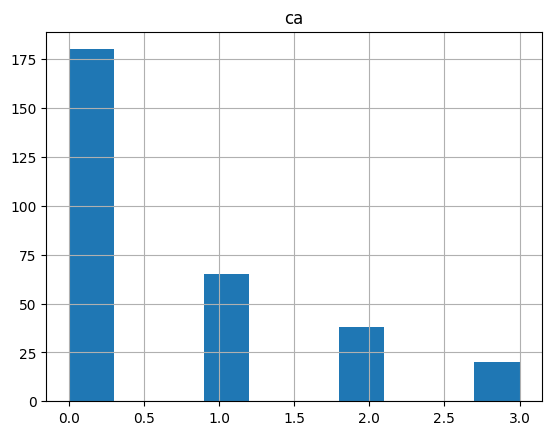

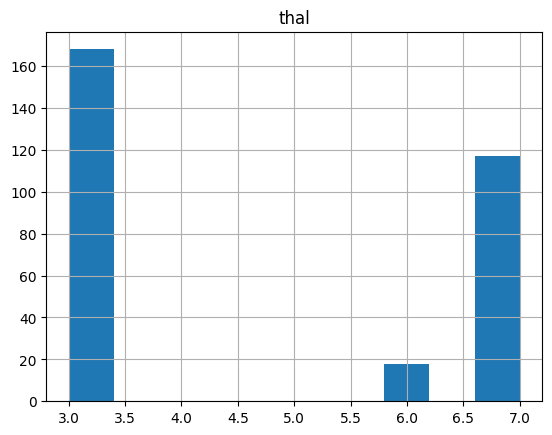

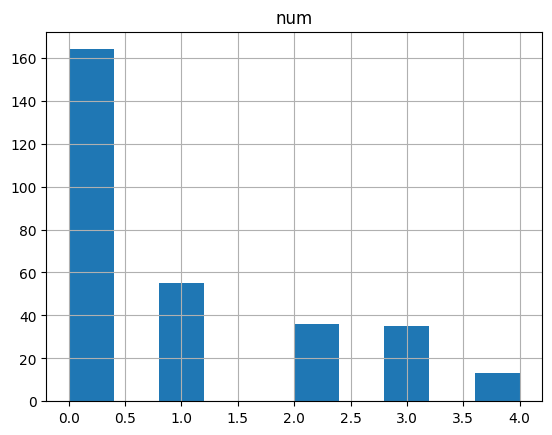

In [13]:
columns = ['age','sex','cp','trestbps','chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
for column in columns:
    data.hist(column)

Заключение:
- Выбросы затрудняют чтение данных по столбацм chol, oldpeak
- На гистограмме данные oldpeak и chol смещены вправо, тогда среднее значение обычно больше медианы

Изучение и обработка выбросов

In [33]:
outlier = data[['chol', 'oldpeak']]
outlier

,chol,oldpeak
0,233,2.3
1,286,1.5
2,229,2.6
3,250,3.5
4,204,1.4
...,...,...
298,264,1.2
299,193,3.4
300,131,1.2
301,236,0.0


In [34]:
Q1 = outlier.quantile(0.25)
Q1

chol       211.0
oldpeak      0.0
Name: 0.25, dtype: float64

In [35]:
Q3 = outlier.quantile(0.75)
Q3

chol       275.0
oldpeak      1.6
Name: 0.75, dtype: float64

In [36]:
IQR = Q3-Q1

data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered

,chol,oldpeak
0,233,2.3
1,286,1.5
2,229,2.6
3,250,3.5
4,204,1.4
...,...,...
298,264,1.2
299,193,3.4
300,131,1.2
301,236,0.0


In [37]:
index_list = list(data_filtered.index.values)

In [38]:
data_filtered = data[data.index.isin(index_list)]
data_filtered.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,AgeGroup
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,4
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,4
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,4
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,2
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,3


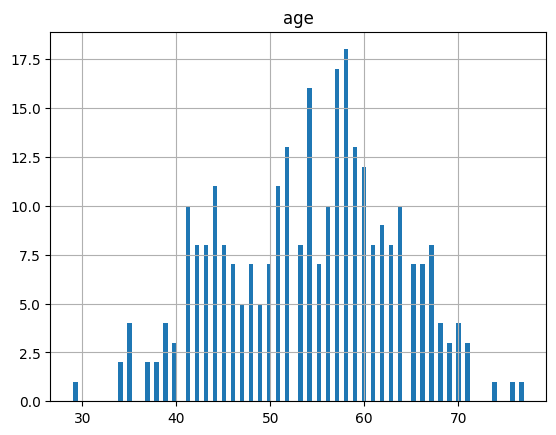

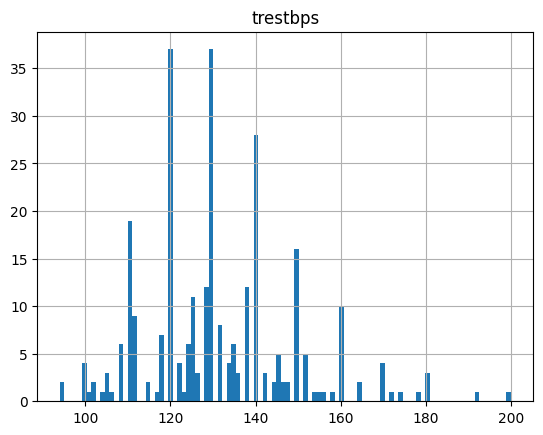

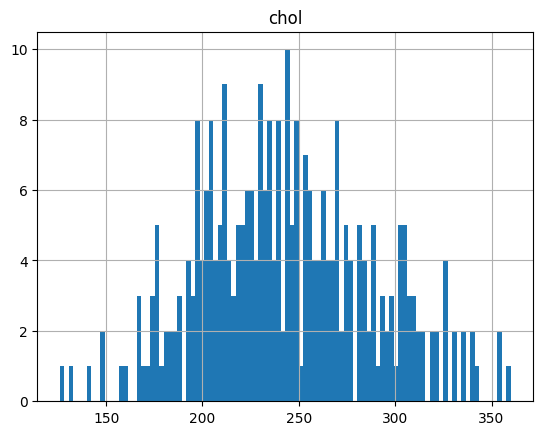

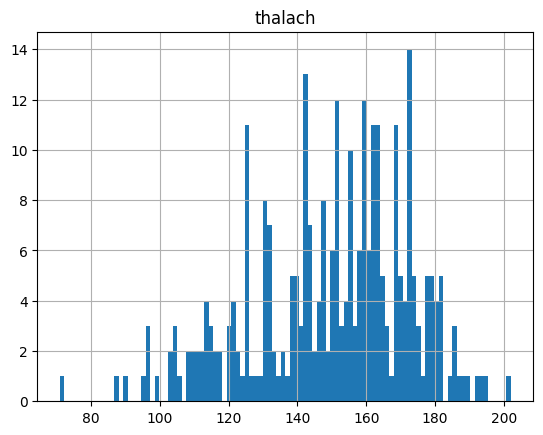

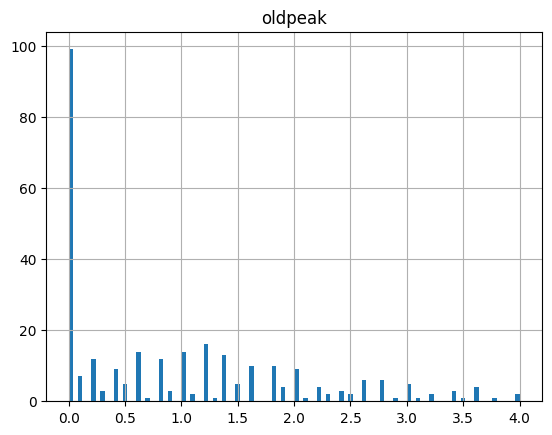

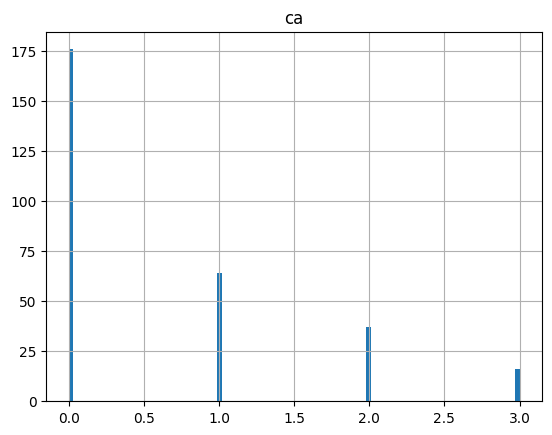

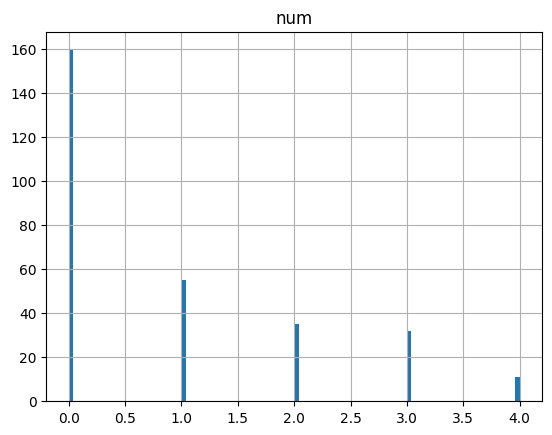

In [39]:
filtered_outlier = data_filtered[['age','trestbps','chol', 'thalach', 'oldpeak', 'ca', 'num']]

for col in filtered_outlier:
    data_filtered.hist(col, bins=100)

Заключение:
- Определили нижний и верхний пределы выбросов, определив 25-й и 75-й процентили. Затем нашли межквартильный размах. Использовали эту информацию для фильтрации выбросов. После удаления выбросов график выглядит более симметричным по сравнению с выбросами, и в данных легче наблюдать среднее значение, медиану и моду.
- Судя по гистограмме значений столбца 'chol', наиболее часто встречаемый холестерин находится в диапазоне 200-250, а реже всего встречаются значения 0-150.
- Судя по гистограмме значений столбца 'oldpeak', наиболее часто встречаемые значения находятся в промежутке 0-0.5, наиболее редко встречаемре 3.5-4.0

Изучение основных параметров без выбросов

[[<Axes: title={'center': 'chol'}>]]
[[<Axes: title={'center': 'chol'}>]]


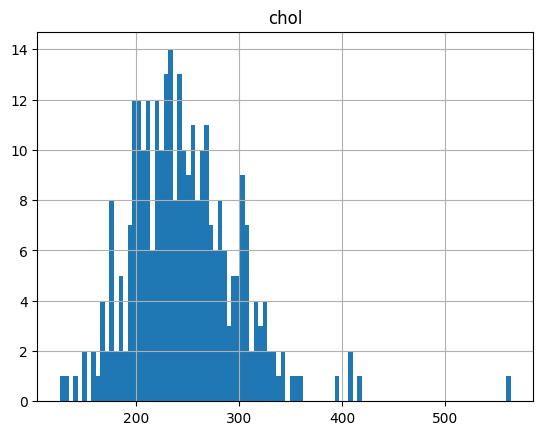

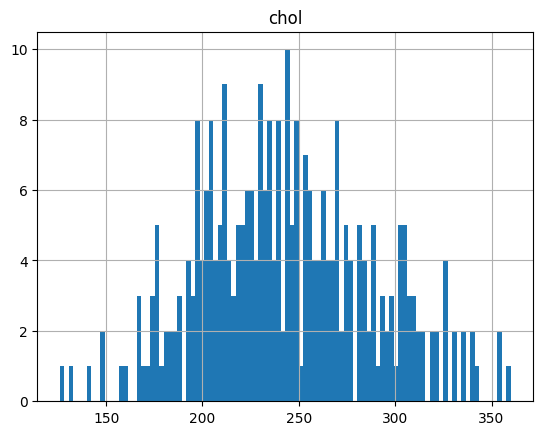

In [40]:
print (data.hist('chol', bins=100))
print (data_filtered.hist('chol', bins=100))

In [41]:
data_filtered.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,AgeGroup
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,54.255973,0.689420,3.146758,131.368601,243.310580,0.150171,0.972696,149.795222,0.327645,0.958703,1.576792,0.634812,4.675768,0.904437,3.191126
std,9.095724,0.463523,0.959255,17.493657,44.830531,0.357850,0.996194,23.068667,0.470158,1.041289,0.601147,0.902669,1.932241,1.198350,0.527650
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,2.000000
25%,47.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,240.000000,0.000000,0.000000,153.000000,0.000000,0.600000,2.000000,0.000000,3.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,273.000000,0.000000,2.000000,167.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000,4.000000
max,77.000000,1.000000,4.000000,200.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.000000,3.000000,3.000000,7.000000,4.000000,4.000000


In [42]:
data.median()

age          56.0
sex           1.0
cp            3.0
trestbps    130.0
chol        241.0
fbs           0.0
restecg       1.0
thalach     153.0
exang         0.0
oldpeak       0.8
slope         2.0
ca            0.0
thal          3.0
num           0.0
AgeGroup      3.0
dtype: float64

Заключение
- Маскимальный холестерин уменьшен с 500 до 350. Гистограмма стала более простой для понимания. Среднее значение выше медианы, поэтому гистограмма имеет наклон вправо.
- На гистограмме без выбросов видно, что значения холестерина чаще всего находятся в промежутке 200-250, реже всего в промежутке 0-150

[[<Axes: title={'center': 'oldpeak'}>]]
[[<Axes: title={'center': 'oldpeak'}>]]


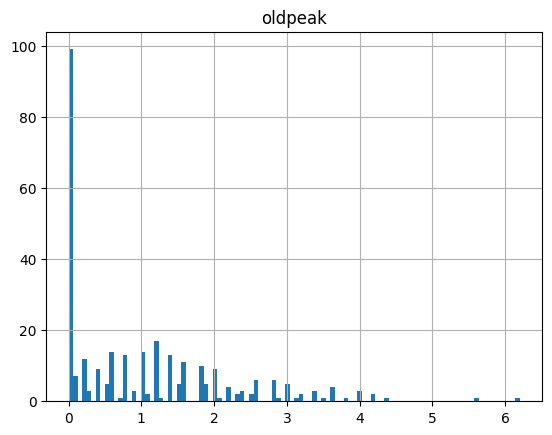

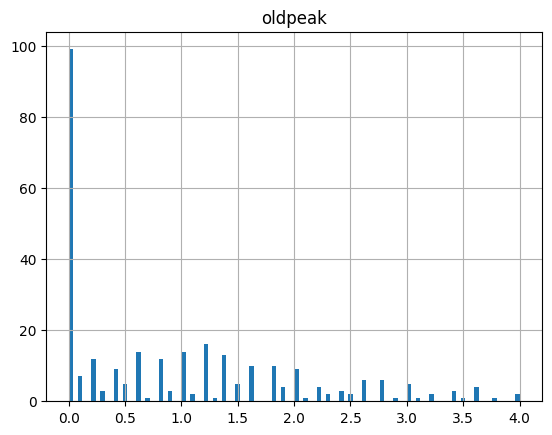

In [43]:
print (data.hist('oldpeak', bins=100))
print (data_filtered.hist('oldpeak', bins=100))

Заключение
- Маскимальное снижение сегмента ST при физической нагрузке уменьшено с 6 до 4. Гистограмма стала более простой для понимания. Среднее значение выше медианы, поэтому гистограмма имеет наклон вправо.
- На гистограмме без выбросов видно, что значения снижения сегмента ST при физической нагрузке чаще всего находятся в промежутке 0-0.5, реже всего в промежутке 3-3.5

Анализ данных

In [44]:
corelation = data_filtered.corr()
corelation['num']

age         0.229413
sex         0.242324
cp          0.393580
trestbps    0.159004
chol        0.075903
fbs         0.081496
restecg     0.198618
thalach    -0.413736
exang       0.408312
oldpeak     0.474643
slope       0.357259
ca          0.490010
thal        0.499791
num         1.000000
AgeGroup    0.137307
Name: num, dtype: float64

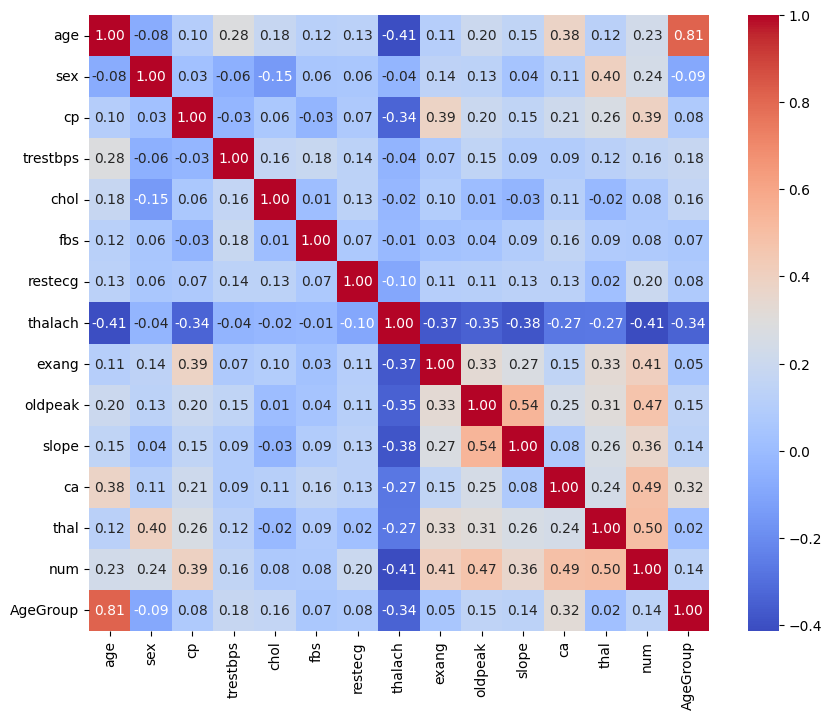

In [45]:
plt.figure(figsize=(10, 8))
sns.heatmap(corelation, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Заключение
- Из тепловой карты видно, что возраст имеет среднюю отрицательную корреляцию с thalach, а также среднюю корреляцию с ca. Остальные характеристики слабо связаны с возрастом, однако из биологии мы знаем, что возраст имеет большое влияние на здоровье человека, вероятно столь слабое влияние на остальные характеристика обуславливается тем, что в датасете большинство людей находится в возрасте 50-60 лет. Из-за этого по данной информации мы не можем судить, как возраст влияет на характеристики. Однако это может значить, что люди, которые обращаются к врачам с проблемами связанными с сердцем чаще всего находятся в довольно большом возрасте.
- Из тепловой карты можно увидеть, что пол имеет среднюю корреляцию с параметром thal, это может значить, что у мужчин повышен этот параметр, относительно женщин. Остальные корреляции слабы, из-за чего мы не можем без дополнительных исследований сказать, связан ли пол с остальными характеристиками.
- Параметр cp имеет среднюю отрицательную корреляцию с параметром thalach, а также среднюю корреляцию с параметрами exang и диагнозом. Возможно, параметр cp имеет большое значение для вынесения диагноза пациенту, и, при постановке диагноза, доктора ориентируются на эту характеристику. Остальные корреляции слабы, сложно сказать имеет ли это какую-либо причинно-следственную связь без проведения реальных исследований.
- Параметры trestbps, chol, fbs, restecg имеют только слабые корреляции со всеми параметрами. Это может указывать на то, что эти параметры не сильно важны для определения болен ли человек или нет. Так же это может быть связанно с тем, что люди, которые обратились к врачу с жалобами на сердце все имеют похожие проблемы, из-за чего эти параметры не влияют на результат. Однако невозможно сказать так ли это, или это проблема малой выборки, для этого нужно проводить медицинские исследования на больших группах населения.
- Параметр thalach имеет среднюю отрицательную корреляцию с параметрами возраста, cp, exang, oldpeak, slope, ca и диагноз. Вероятно, это говорит о том, что этот параметр является формирующим для других параметров, и именного от него зависят остальные характеристики. А средняя отрицательная корреляция с диагнозом может значить, что при выявлении болезни, доктора ориентируются на эту характеристику.
- Параметры exang, oldpeak, slope, ca, thal имеют средние корреляции с параметром диагноза, это может значить, что эти параметры характеризуют работу сердца и, если в них есть аномалии врачи оценивают состояние сердца как больное. Также большая часть этих параметров имеют среднюю корреляцию между собой, это может значить, что если человек имеет проблемы с сердце у него возникают аномальные значения не в одном параметре, а сразу в нескольких.
- В итоге с диагнозом средне коррелируют параметры cp, exang, oldpeak, slope, ca, thal и средне отрицательно thalach, остальные параметры влияют слабо. Вероятно, это значит, что доктора оценивают именно эти характеристики при постановке заболеваний сердца.


# Общие выводы:

Изменение типа данных:

- Тип данных столбцов 'ca' и 'thal' изменен на int.

Редактирование данных:

- Добавили возрастные группы

Проверка выбросов:

Выбросы параметров: chol, oldpeak

Удаление выбросов:

- Определили нижний и верхний пределы выбросов и сохранили их в отдельном DataFrame.
- Выполнили сравнение, используя гистограмму данных, которые содержат выбросы и не содержат выбросов. Сравнение показало, что гистограмма без выбросов позволяет легко исследовать среднее, медианное значение в данных столбцов.

Изучение постановки диагноза:

*Возраст*

Возраст имеет среднюю отрицательную корреляцию с thalach, а также среднюю корреляцию с ca. Остальные характеристики слабо связаны с возрастом, однако из биологии мы знаем, что возраст имеет большое влияние на здоровье человека, вероятно столь слабое влияние на остальные характеристика обуславливается тем, что в датасете большинство людей находится в возрасте 50-60 лет. Из-за этого по данной информации мы не можем судить, как возраст влияет на характеристики. Однако это может значить, что люди, которые обращаются к врачам с проблемами связанными с сердцем чаще всего находятся в довольно большом возрасте.

*Пол*

Пол имеет среднюю корреляцию с параметром thal, это может значить, что у мужчин повышен этот параметр, относительно женщин. Остальные корреляции слабы, из-за чего мы не можем без дополнительных исследований сказать, связан ли пол с остальными характеристиками.

*Cp*

Параметр cp имеет среднюю отрицательную корреляцию с параметром thalach, а также среднюю корреляцию с параметрами exang и диагнозом. Возможно, параметр cp имеет большое значение для вынесения диагноза пациенту, и, при постановке диагноза, доктора ориентируются на эту характеристику.

*Trestbps, chol, fbs*

Параметры trestbps, chol, fbs, restecg имеют только слабые корреляции со всеми параметрами. Это может указывать на то, что эти параметры не сильно важны для определения болен ли человек или нет. Так же это может быть связанно с тем, что люди, которые обратились к врачу с жалобами на сердце все имеют похожие проблемы, из-за чего эти параметры не влияют на результат.

*Thalach*

Параметр thalach имеет среднюю отрицательную корреляцию с параметрами возраста, cp, exang, oldpeak, slope, ca и диагноз. Вероятно, это говорит о том, что этот параметр является формирующим для других параметров, и именного от него зависят остальные характеристики.

*Exang, oldpeak, slope, ca, thal*

Параметры exang, oldpeak, slope, ca, thal имеют средние корреляции с параметром диагноза, это может значить, что эти параметры характеризуют работу сердца и, если в них есть аномалии врачи оценивают состояние сердца как больное. Также большая часть этих параметров имеют среднюю корреляцию между собой, это может значить, что если человек имеет проблемы с сердце у него возникают аномальные значения не в одном параметре, а сразу в нескольких.


In [ ]:
data_filtered.to_csv('classification.csv', index=False)

In [3]:
import pandas as pd

# Создаем DataFrame с вашими данными
data = {
    'age': [63, 67, 67, 37, 41],
    'sex': [1, 1, 1, 1, 0],
    'cp': [1, 4, 4, 3, 2],
    'trestbps': [145, 160, 120, 130, 130],
    'chol': [233, 286, 229, 250, 204],
    'fbs': [1, 0, 0, 0, 0],
    'restecg': [2, 2, 2, 0, 2],
    'thalach': [150, 108, 129, 187, 172],
    'exang': [0, 1, 1, 0, 0],
    'oldpeak': [2.3, 1.5, 2.6, 3.5, 1.4],
    'slope': [3, 2, 2, 3, 1],
    'ca': [0, 3, 2, 0, 0],
    'thal': [6, 3, 7, 3, 3],
    'AgeGroup': [4, 4, 4, 2, 3]
}

df = pd.DataFrame(data)

# Сохраняем в CSV с правильными параметрами
df.to_csv('correct.csv', 
          index=False,  # не сохранять индексы
          encoding='utf-8',  # правильная кодировка
          sep=',')  # разделитель - запятая


In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,AgeGroup
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,4
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,4
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,4
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,2
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,3
